<a href="https://colab.research.google.com/github/BjornIronSide12/will_get_placed_logistic_regression/blob/main/end_to_end_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_csv('/content/placement.csv')

In [7]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [9]:
df.shape

(100, 4)

In [11]:
df = df.iloc[:,1:] #by doing this we will get all rows but columns from 1st column

In [12]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [13]:
import matplotlib.pyplot as plt #Matplotlib is a plotting library for the Python

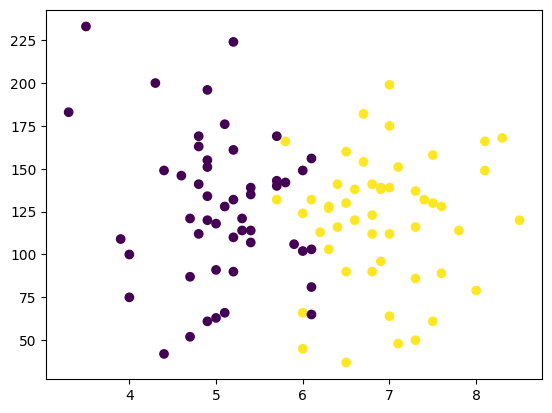

In [15]:
plt.scatter(df['cgpa'], df['iq'], c = df['placement']) #colour coding is done on the basis of placement status

In [16]:
#data is linear ie. around students having <6 CGPA are not getting placed rest are getting placed in such case we can seperate classes linearly ie. data is liner so we can apply logistic regression in such a cases

In [17]:
#CGPA and IQ are considered to be independent variables we assume that they don't have any relation with each other
# Placed -> is dependent variable
x = df.iloc[:,0:2]
y = df.iloc[:, -1]

In [21]:
x.shape

(100, 2)

In [20]:
y.shape

(100,)

In [32]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(x,y, test_size=0.1)

In [33]:

X_train

,cgpa,iq
63,6.3,128.0
45,6.0,66.0
75,4.8,169.0
83,7.5,130.0
16,5.2,224.0
...,...,...
28,5.2,90.0
99,6.2,113.0
62,6.0,102.0
19,5.2,132.0


In [34]:
Y_train

63    1
45    1
75    0
83    1
16    0
     ..
28    0
99    1
62    0
19    0
73    0
Name: placement, Length: 90, dtype: int64

In [35]:
#scale variable between 0 to 1
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [40]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_train

array([[ 0.29189946,  0.07750847],
       [ 0.02382853, -1.50673068],
       [-1.0484552 ,  1.1251505 ],
       [ 1.36418319,  0.12861296],
       [-0.69102729,  2.53052394],
       [ 0.9173983 ,  1.27846397],
       [ 2.07903901,  1.09959825],
       [ 1.90032506,  0.61410561],
       [ 0.64932737,  1.45732968],
       [-1.49524009,  1.91727008],
       [-2.21009591,  2.76049414],
       [ 0.29189946, -0.56129764],
       [-1.852668  , -0.40798417],
       [-0.51231334, -0.28022295],
       [-0.24424241,  1.1251505 ],
       [ 1.63225412, -0.28022295],
       [ 0.47061342, -0.89347682],
       [-0.78038427,  1.30401621],
       [ 0.82804133,  0.33303092],
       [ 0.55997039, -0.12690948],
       [-0.24424241,  0.38413541],
       [-0.95909823, -0.12690948],
       [ 0.38125644, -0.22911846],
       [-0.60167032, -0.28022295],
       [ 1.18546924, -1.91556659],
       [-0.95909823,  0.6652101 ],
       [-0.15488543,  0.4352399 ],
       [ 0.1131855 , -1.12344702],
       [-0.51231334,

In [42]:
X_test = scaler.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [43]:
from sklearn.linear_model import LogisticRegression

In [44]:
clf = LogisticRegression()

In [45]:
#model training
clf.fit(X_train, Y_train)

LogisticRegression()

In [46]:
clf.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [47]:
Y_test

57    1
94    0
3     1
76    0
9     0
92    0
90    1
64    1
69    1
80    0
Name: placement, dtype: int64

In [48]:
from sklearn.metrics import accuracy_score

In [50]:
Y_pred = clf.predict(X_test)

In [51]:
accuracy_score(Y_test,Y_pred)

0.5

In [52]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

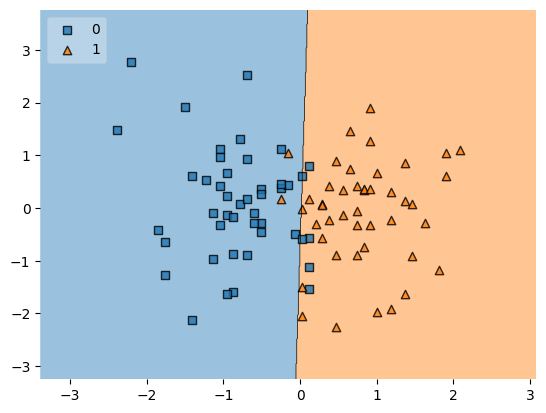

In [55]:
# Plotting decision regions
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [57]:
import pickle #in python everything is an object, pickel converts objects into files and we can use the file anywhere

In [59]:
pickle.dump(clf,open('model.pkl','wb'))